In [1]:
%%capture --no-display
%pip install python-dotenv
%pip install web3
%pip install ens

In [2]:
%load_ext dotenv
%dotenv

In [3]:
import os

infuraApiKey = os.environ.get("INFURA_API_KEY")

In [4]:
from web3 import Web3

infura_url = f"https://mainnet.infura.io/v3/{infuraApiKey}"
web3 = Web3(Web3.HTTPProvider(infura_url))
web3.is_connected()

True

In [5]:
from ens import ENS

ns = ENS.from_web3(web3)

In [6]:
owner_address = ns.owner("0x00099.eth")
owner_address

'0xD4416b13d2b3a9aBae7AcD5D6C2BbDBE25686401'

In [7]:
domain_name = ns.name(owner_address)
domain_name

'wrapper.ens.eth'

In [8]:
import json

sc_address="0x57f1887a8BF19b14fC0dF6Fd9B2acc9Af147eA85"
with open ("./abi/eth_deployer.json") as file:
    abi = json.load(file)

contract = web3.eth.contract(address=sc_address, abi=abi)

In [9]:
number = contract.functions.balanceOf(owner_address).call()
print(f"The address {owner_address} has {number} tokens.")

The address 0xD4416b13d2b3a9aBae7AcD5D6C2BbDBE25686401 has 377929 tokens.


In [10]:
# mint transactin id
transaction_id = '0x55bee7a7a2326f782e369f99334e2962fa7ec50abde4b0fd6ff01759663619c3'

txreceipt = web3.eth.get_transaction_receipt(transaction_id)

abi_events = [abi for abi in contract.abi if abi["type"] == "event"]

In [11]:
%%capture --no-display

for event in abi_events:
    name = event["name"]
    inputs = [param["type"] for param in event["inputs"]]
    inputs = ",".join(inputs)

    event_abi_human = f"{name}({inputs})"
    event_abi_hex = web3.to_hex(web3.keccak(text = event_abi_human))

    for l in range (0, len (txreceipt['logs'])):
        event_hex = web3.to_hex(txreceipt['logs'][l]['topics'][0])
        if event_abi_hex == event_hex:
            decoded_logs = contract.events[event["name"]]().process_receipt(txreceipt)

In [12]:
decoded_logs[0]

AttributeDict({'args': AttributeDict({'from': '0xEF194c5F2922265b8f4F505a2fC81d2846ED4444',
  'to': '0x0000000000000000000000000000000000000000',
  'tokenId': 22531292620589107036875725734643538584683622826000144778529324893632131628542}),
 'event': 'Transfer',
 'logIndex': 347,
 'transactionIndex': 140,
 'transactionHash': HexBytes('0x55bee7a7a2326f782e369f99334e2962fa7ec50abde4b0fd6ff01759663619c3'),
 'address': '0x57f1887a8BF19b14fC0dF6Fd9B2acc9Af147eA85',
 'blockHash': HexBytes('0x2cb1e4c4d506ee255f52e78bf2a680ad4f7e67d49afb24802749293d958fc1d9'),
 'blockNumber': 19947189})

In [13]:
token_id = decoded_logs[0]['args']['tokenId']
token_id

22531292620589107036875725734643538584683622826000144778529324893632131628542

In [14]:
registrar_address = decoded_logs[0]['address']
registrar_address

'0x57f1887a8BF19b14fC0dF6Fd9B2acc9Af147eA85'

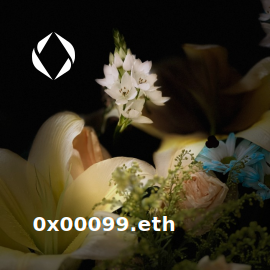

In [15]:
import requests
from IPython.display import SVG, display

url_metadata= f"https://metadata.ens.domains/mainnet/{registrar_address}/{token_id}"
response = requests.get(url_metadata).json()

display(SVG(url = response["image"]))